## Membuat Bar Chart Race Serie A 2020-2021

Pembuatan bar chart race ini terinspirasi dari bar chart race yang dilakukan oleh akun github milik 
<a href='https://github.com/pratapvardhan/notebooks/blob/master/barchart-race-matplotlib.ipynb'>pratapvardhan</a>.
Dataset yang saya gunakan diambil dari website fctables.com yang dapat dilihat melalui link berikut <a href='https://www.fctables.com/italy/serie-a/'>`fctables`</a>.<br> Dataset yang digunakan kali ini akan diubah menjadi bentuk yang sama seperti milik pratapvardhan agar sesuai dengan format animasi bar chart race. berikut adalah gambar dataset milik pratapvardhan yang akan ditiru bentuknya.<br> <img src='inter/pratapvardhan-notebooks.png'><br> 
Berdasarkan gambar tersebut nilai dari kolom 'name' dan 'group' selalu diulang-ulang, nilai dari kolom 'year' terurut berdasarkan tahun terlama dan nilai dari kolom 'value' selalu bertambah setiap barisnya. kolom 'value' inilah yang akan menjadi faktor utama bar chart race agar selalu bertambah setiap framenya.


In [163]:
#Import beberapa library yang digunakan
import pandas as pd
import matplotlib.pyplot as plt
import bar_chart_race as bcr
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [164]:
#import file
url=('inter/fctables.csv')
df = pd.read_csv(url)

In [165]:
#print 5 teratas
df.head()

,posisi,tim,gameplay,poin,form
0,1.0,Inter,38.0,91.0,W
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,L
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,W


Berdasarkan tabel di atas, terdapat baris-baris yang benar-benar kosong. Baris-baris tersebut akan dihapus agar memudahkan dalam memvisualisakan data.

In [166]:
#hapus row yang kosong
df = df.dropna(thresh=1)

In [167]:
df.head()

,posisi,tim,gameplay,poin,form
0,1.0,Inter,38.0,91.0,W
2,NaN,NaN,NaN,NaN,L
4,NaN,NaN,NaN,NaN,W
6,NaN,NaN,NaN,NaN,W
8,NaN,NaN,NaN,NaN,W


In [168]:
#cek info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   posisi    20 non-null     float64
 1   tim       20 non-null     object 
 2   gameplay  20 non-null     float64
 3   poin      20 non-null     float64
 4   form      760 non-null    object 
dtypes: float64(3), object(2)
memory usage: 35.6+ KB


In [169]:
df['form'].unique()

array(['W', 'L', 'D'], dtype=object)

kolom 'form' akan digunakan untuk melihat peningkatan poin setiap minggunya sehingga nilai pada kolom ini harus diubah, nilai 'W' berarti Win yang artinya mendapat 3 poin, nilai 'L' berarti lose yang artinya mendapat ) poin dan nilai 'D' yang artinya Draw dan mendapat 1 poin.

In [170]:
#Ubah value D menjadi 1, W menjadi 3, dan L menjadi 0
df=df.replace(to_replace='D', value=1)
df=df.replace(to_replace='W', value=3)
df=df.replace(to_replace='L', value=0)

In [171]:
df.head()

,posisi,tim,gameplay,poin,form
0,1.0,Inter,38.0,91.0,3
2,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,3
6,NaN,NaN,NaN,NaN,3
8,NaN,NaN,NaN,NaN,3


In [172]:
#memastikan value dari kolom form sudah sesuai
df['form'].unique()

array([3, 0, 1], dtype=int64)

Setelah kolom 'form' berubah, selanjutnya adalah mengisi nilai kosong dari kolom 'tim' agar selalu berulang.

In [173]:
#memastikan nilai dari kolom 'tim' lengkap dan hanya satu
match = df['form'].groupby([df['tim']]).count()

In [174]:
match

tim
AC Milan      1
Atalanta      1
Benevento     1
Bologna       1
Cagliari      1
Crotone       1
Fiorentina    1
Genoa         1
Inter         1
Juventus      1
Lazio         1
Napoli        1
Parma         1
Roma          1
Sampdoria     1
Sassuolo      1
Spezia        1
Torino        1
Udinese       1
Verona        1
Name: form, dtype: int64

In [175]:
#menyalin nilai kolom tim ke semua baris
df['tim'].fillna(method='ffill', inplace=True)

In [176]:
#memastikan nilai dari kolom tim sudah berulang dan sesuai dengan jumlah pertandingan satu musim yaitu 38 pertandingan
tim_count = df['tim'].groupby(df['tim']).count()

In [177]:
tim_count

tim
AC Milan      38
Atalanta      38
Benevento     38
Bologna       38
Cagliari      38
Crotone       38
Fiorentina    38
Genoa         38
Inter         38
Juventus      38
Lazio         38
Napoli        38
Parma         38
Roma          38
Sampdoria     38
Sassuolo      38
Spezia        38
Torino        38
Udinese       38
Verona        38
Name: tim, dtype: int64

In [178]:
#print 5 teratas
df.head()

,posisi,tim,gameplay,poin,form
0,1.0,Inter,38.0,91.0,3
2,NaN,Inter,NaN,NaN,0
4,NaN,Inter,NaN,NaN,3
6,NaN,Inter,NaN,NaN,3
8,NaN,Inter,NaN,NaN,3


Setelah kolom 'tim' sudah terisi semua maka baris ke 1 hingga ke 38 akan memiliki nilai yang sama. Sebagai contoh baris 1 sampai 38 adalah 'inter', baris 39 sampai 76 adalah 'ac milan', dan seterusnya. Berdasarkan dataset diatas, baris pertama tim inter adalah gameplay ke-38 yang artinya posisi terbawah dari tim inter adalah gameplay ke-1. maka langkah selanjutnya adalah menjumlahkan nilai kolom 'form' dari baris terbawah setiap kolom 'tim' agar hasil nilai teratas dari penjumlahan tersebut adalah hasil dari gameplay ke 38 masing-masing tim.  <br>

In [179]:
#membuat kalkulasi poin per pertandingan dari baris paling bawah setiap tim
df['cum_poin']=df.form[::-1].groupby(df['tim']).cumsum()

In [180]:
#print 5 teratas
df.head()

,posisi,tim,gameplay,poin,form,cum_poin
0,1.0,Inter,38.0,91.0,3,91
2,NaN,Inter,NaN,NaN,0,88
4,NaN,Inter,NaN,NaN,3,88
6,NaN,Inter,NaN,NaN,3,85
8,NaN,Inter,NaN,NaN,3,82


kolom 'cum poin' diatas akan menggantikan kolom 'poin'. Langkah selanjutnya mengisi kolom 'gameplay', kolom gameplay yang berisi nilai hanya pada baris pertama setiap tim yaitu bernilai 38. Progres nilai tersebut selalu naik satu nilai sehingga jika setiap baris dikurang satu maka dibaris kolom terbawah akan bernilai satu. 

In [181]:
#membuat nilai baru untuk dikurangi dengan jumlah gameplay
df['gem']=df['gameplay'].isnull().astype(int).groupby(df['gameplay'].notnull().cumsum()).cumsum()

In [182]:
#mengurangi gameplay dengan kolom gem yang baru dibuat
df['gameplay'] = df['gameplay'].fillna(method='ffill') - df['gem']

In [183]:
#print 5 teratas
#kolom gameplay menjadi berurut dari value teratas (38) berkurang 1 hingga value (1) di baris terbawah
df.head()

,posisi,tim,gameplay,poin,form,cum_poin,gem
0,1.0,Inter,38.0,91.0,3,91,0
2,NaN,Inter,37.0,NaN,0,88,1
4,NaN,Inter,36.0,NaN,3,88,2
6,NaN,Inter,35.0,NaN,3,85,3
8,NaN,Inter,34.0,NaN,3,82,4


Akhirnya setiap kolom yang dibutuhkan telah terisi dan sesuai dengan format dataset dari pratapvardhan. kolom-kolom yang akan digunakan adalah kolom 'tim','gameplay',dan kolom 'cum poin'. oleh karena itu kolom-kolom sisnya tidak akan digunaka yaitu kolom 'posisi','poin','dan 'form'. kolom 'posisi' tidak digunakan karena saat bar chart race nanti posisi setiap tim akan ditentukan berdasarkan kolom 'cum_poin' per gameplaynya.

In [184]:
#hanya memunculkan kolom yang akan digunakan
chart_race = df.iloc[:, [1,2,5]].copy()

In [185]:
#print
chart_race

,tim,gameplay,cum_poin
0,Inter,38.0,91
2,Inter,37.0,88
4,Inter,36.0,88
6,Inter,35.0,85
8,Inter,34.0,82
...,...,...,...
1491,Parma,5.0,4
1493,Parma,4.0,3
1495,Parma,3.0,3
1497,Parma,2.0,0


sebelum memulai membuat bar char race, nilai dari kolom 'gameplay' masih memiliki koma yang artinya kolom tersebut bertipe data float. kolom tersebut harus diubah menjadi integer agar tidak memiliki koma lagi.

In [186]:
#memastikan jenis tiap kolom
chart_race.dtypes

tim          object
gameplay    float64
cum_poin      int64
dtype: object

In [187]:
#mengubah tipe data kolom gameplay dari float64 menjadi int64
chart_race['gameplay'] = chart_race['gameplay'].astype('int64')

In [188]:
#memastikan tipe data kolom gameplay telah berubah
chart_race.dtypes

tim         object
gameplay     int64
cum_poin     int64
dtype: object

In [189]:
#print 5 teratas
chart_race.head()

,tim,gameplay,cum_poin
0,Inter,38,91
2,Inter,37,88
4,Inter,36,88
6,Inter,35,85
8,Inter,34,82


In [190]:
#mengubah nama kolom dari cum_poin menjadi poin
chart_race = chart_race.rename({'cum_poin': 'poin'}, axis=1)

In [191]:
chart_race

,tim,gameplay,poin
0,Inter,38,91
2,Inter,37,88
4,Inter,36,88
6,Inter,35,85
8,Inter,34,82
...,...,...,...
1491,Parma,5,4
1493,Parma,4,3
1495,Parma,3,3
1497,Parma,2,0


In [192]:
#dataframe sebelumnya index tidak berurut dari 0,2,4,dst
#mereset index tersebut
chart_race.reset_index(drop=True)

,tim,gameplay,poin
0,Inter,38,91
1,Inter,37,88
2,Inter,36,88
3,Inter,35,85
4,Inter,34,82
...,...,...,...
755,Parma,5,4
756,Parma,4,3
757,Parma,3,3
758,Parma,2,0


In [193]:
#sort value nilai terkecil dari kolom gameplay agar data dimulai dari game ke-1
chart_race=chart_race.sort_values(['tim','gameplay'], ascending=True)

In [194]:
chart_race

,tim,gameplay,poin
149,AC Milan,1,3
147,AC Milan,2,6
145,AC Milan,3,9
143,AC Milan,4,12
141,AC Milan,5,13
...,...,...,...
683,Verona,34,42
681,Verona,35,43
679,Verona,36,43
677,Verona,37,44


In [195]:
#memastikan satu nilai sudah sesuai dari gameplay ke-1 hingga terakhir
chart_race.loc[(chart_race['tim']=='Inter')]

,tim,gameplay,poin
74,Inter,1,3
72,Inter,2,6
70,Inter,3,7
68,Inter,4,7
66,Inter,5,10
64,Inter,6,11
62,Inter,7,12
60,Inter,8,15
58,Inter,9,18
56,Inter,10,21


In [196]:
#mengecek nilai unik dari kolom tim
chart_race['tim'].unique()

array(['AC Milan', 'Atalanta', 'Benevento', 'Bologna', 'Cagliari',
       'Crotone', 'Fiorentina', 'Genoa', 'Inter', 'Juventus', 'Lazio',
       'Napoli', 'Parma', 'Roma', 'Sampdoria', 'Sassuolo', 'Spezia',
       'Torino', 'Udinese', 'Verona'], dtype=object)

In [197]:
#Membuat dictionary baru untuk pemberian warna
colors = dict(zip(
    ['AC Milan', 'Atalanta', 'Benevento', 'Bologna', 'Cagliari',
       'Crotone', 'Fiorentina', 'Genoa', 'Inter', 'Juventus', 'Lazio',
       'Napoli', 'Parma', 'Roma', 'Sampdoria', 'Sassuolo', 'Spezia',
       'Torino', 'Udinese', 'Verona'],
    ['#FB090B','#1E71B8','#dbde3c','#1A2F48','#AD002A', '#1A2F48',
    '#482E92', '#AD1919','#0068A8','gray','#87D8F7','#12A0D7',
    '#FFD200','#b8180d','#1B5497','#00A752','#A29161','#b8180d', 'gray','#dbde3c']
))

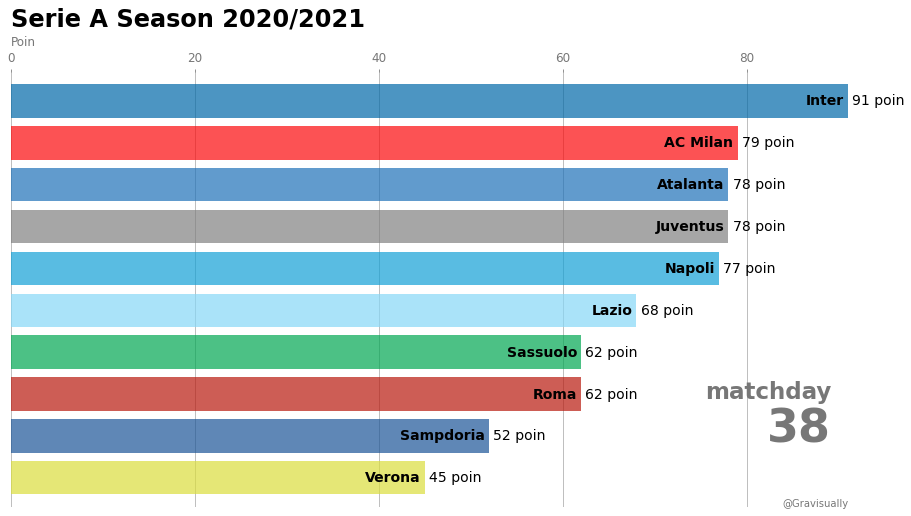

In [198]:
#Visualisasi data
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(matchday):
    df = chart_race[chart_race['gameplay'].eq(matchday)].sort_values(by='poin', ascending=True).tail(10)
    # .eq artinya df[df['year'] sama dengan (current_year)
    ax.clear()
    ax.barh(df['tim'], df['poin'], alpha=.7, color=[colors[x] for x in df['tim']]) # membuat bar horizontal
    dx = df['poin'].max() / 200
    for i, (poin, tim) in enumerate(zip(df['poin'], df['tim'])):
        ax.text(poin-dx, i,     tim,           size=14, weight=600, ha='right', va='center', color='k') #name disini berarti kota (merujuk pada kolom name)
        ax.text(poin+dx, i,     f'{poin:,.0f} poin',  size=14, ha='left',  va='center') # nilai
    ax.text(0.98, 0.25, 'matchday', transform=ax.transAxes, color='#777777', size=23, ha='right', weight=800) #menempatkan text di posisi tertentu
    ax.text(0.98, 0.15, matchday, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800) #menempatkan text di posisi tertentu
    ax.text(0, 1.06, 'Poin', transform=ax.transAxes, size=12, color='#777777') #menempatkan text di posisi tertentu
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}')) #format label
    ax.xaxis.set_ticks_position('top') #posisi label (nilai yang bisa dipake :'top', 'bottom', 'both', 'default', 'none')
    ax.tick_params(axis='x', colors='#777777', labelsize=12) #label x atau y
    ax.set_yticks([]) # berfungsi sama seperti plt.yticks([])
    ax.margins(0, 0.03) # nilai pertama marjin kiri dan kanan, nilai kedua untuk marjin atas dan bawah
    ax.grid(which='major', axis='x', linestyle='-') # axis untuk menentukan arah grid vertikal atau horizontal
    ax.set_axisbelow(True) # membuat grid berada di bawah bar
    ax.text(0, 1.15, 'Serie A Season 2020/2021',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top') #menempatkan text di posisi tertentu (bisa menjadi plt.title)
    ax.text(1, 0, '@Gravisually', transform=ax.transAxes, color='#777777', ha='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white')) #menempatkan text di posisi tertentu
    
    plt.rcParams['figure.facecolor'] = 'white'
    plt.box(False)
draw_barchart(38)

<IPython.core.display.HTML object>

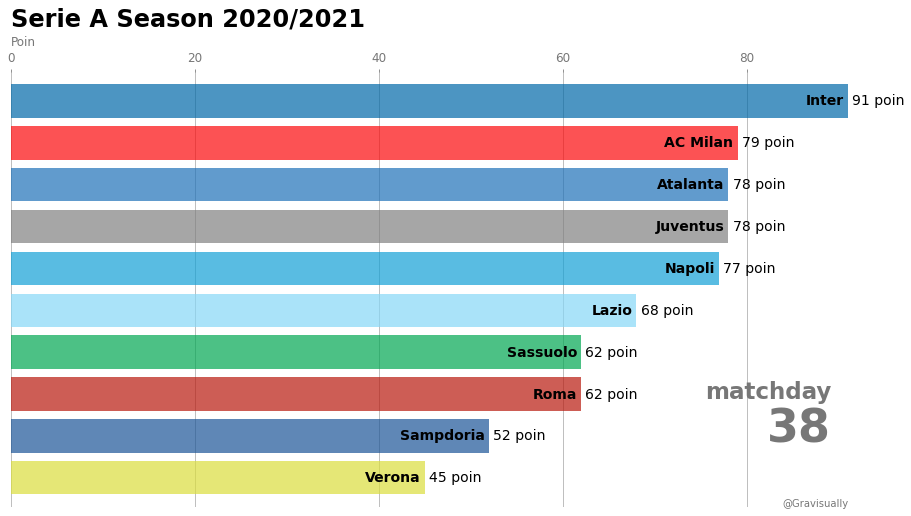

In [199]:
#membuat chart race
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(0, 39),interval=20, repeat_delay=3000)
HTML(animator.save(filename='inter/Serie_A_Season_2020_2021.gif', fps=1))
# use animator.to_jshtml() untuk output di notebook
#use animator.to_html5_video() untuk output di notebook
#animator.save() untuk menyimpan di local disk

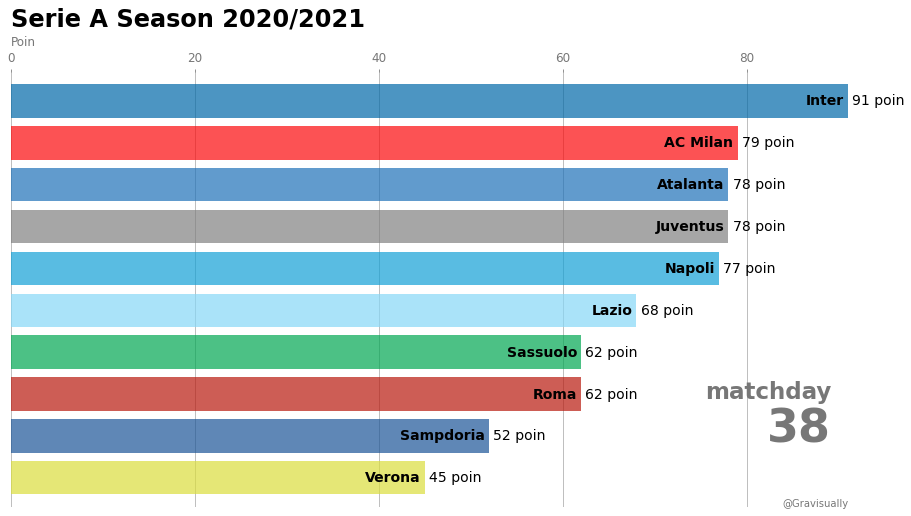

In [200]:
#membuat chart race
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(0, 39), interval=20, repeat_delay=3000)
HTML(animator.to_jshtml(fps=1))
# use animator.to_jshtml() untuk output di notebook
#use animator.to_html5_video() untuk output di notebook
#animator.save() untuk menyimpan di local disk

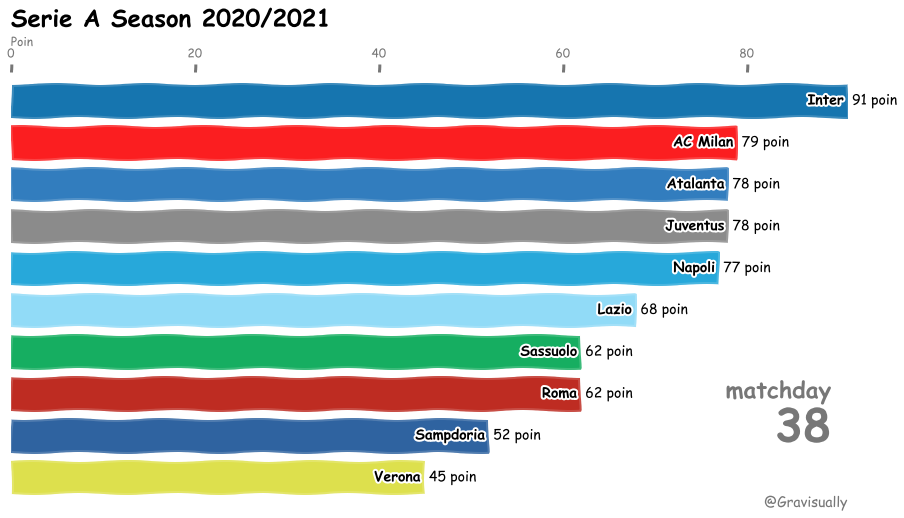

In [201]:
#alternatif style
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(15, 8))
    draw_barchart(38)